Upload the following notebook to your google drive and run the first two code cell to download the dataset from Github: YourNameA6.ipynbDownload YourNameA6.ipynb

Using the "Used_cars_price_prediction.ipynb" from Assignment 5, perform the Linear Regression, Support Vector Machine, Decision Tree, Random Forest and XGBoost learning model.

Provide the accuracy and performamnce metric as shown in the  "Used_cars_price_prediction.ipynb" in your notebook.

What to submit:

The Jupyter Notebook.

Using LR, SVM, DT, RF & XGB from sklearn to predict Insurance Charges

In [ ]:
!pip install xgboost
!pip install wordcloud
!pip install plotly

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [ ]:
# Load the insurance Dataset from Github
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

In [ ]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

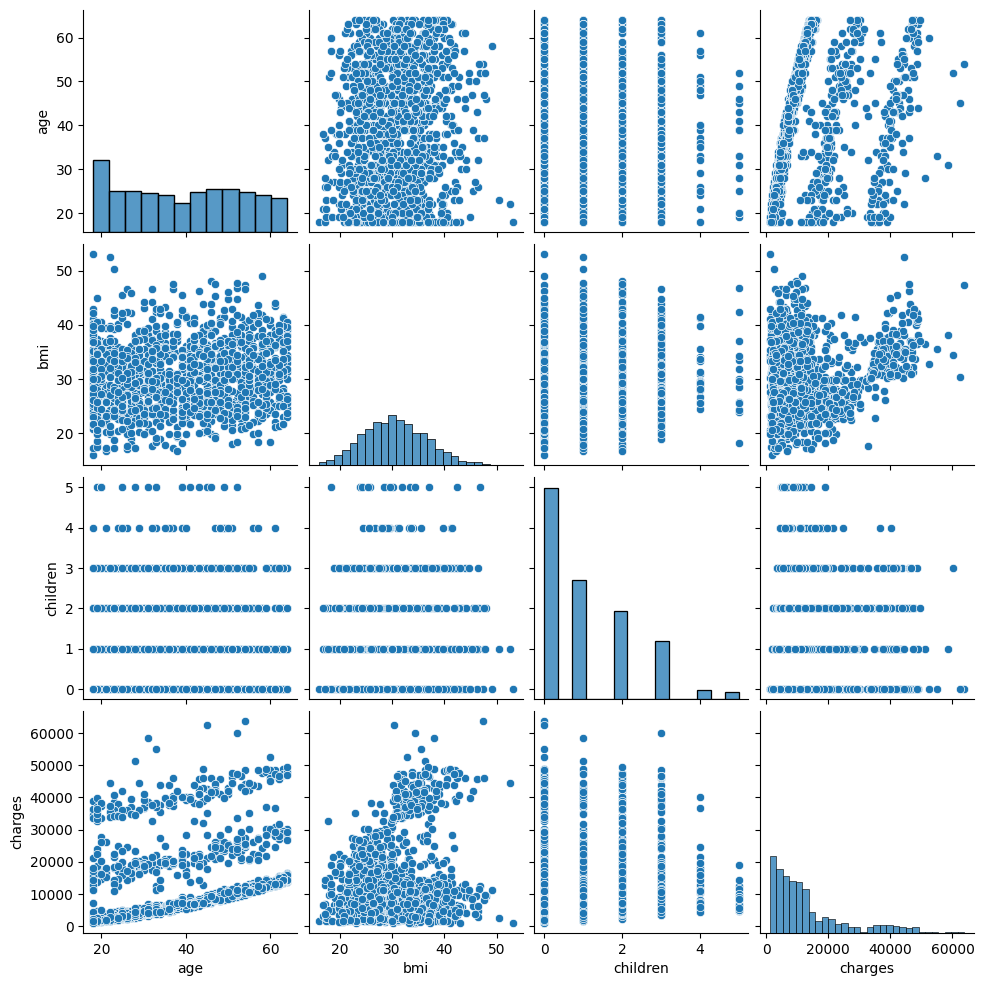

In [ ]:
sns.pairplot(data=df)

In [ ]:
df['sex'] = pd.Categorical(df['sex'])
df['smoker'] = pd.Categorical(df['smoker'])
df['region'] = pd.Categorical(df['region'])

In [ ]:
df['sex'] = df['sex'].cat.codes
df['smoker'] = df['smoker'].cat.codes
df['region'] = df['region'].cat.codes


In [ ]:
df.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [ ]:
target = df.pop('charges')
features = df

In [ ]:
target.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
features.head()

age  sex     bmi  children  smoker  region
0   19    0  27.900         0       1       3
1   18    1  33.770         1       0       2
2   28    1  33.000         3       0       2
3   33    1  22.705         0       0       1
4   32    1  28.880         0       0       1

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [ ]:
L_model = LinearRegression()
L_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
accuracy_L_model = L_model.score(X_test, y_test)
print('Score = ', accuracy_L_model)

Score =  0.799859199880231


In [ ]:
from sklearn.svm import SVR  # for regression tasks

# For regression:
svm_model = SVR(kernel='linear')  # Similar to classification, you can change the kernel type

# Training the SVM:
# svm_classifier.fit(X_train, y_train)  # For classification
svm_model.fit(X_train, y_train)   # For regression


SVR(kernel='linear')

In [ ]:
accuracy_svm = svm_model.score(X_test, y_test)  # Compare predicted labels with actual labels
print(f'Accuracy: {accuracy_svm *100:.2f}%')

Accuracy: -18.18%


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 30600637.578780644
R-squared: 0.7998591998802312


In [ ]:
#Decision tree
#Random forest
#Decision Tree

#Involve the decision tree regression model
DecisionTree_model = DecisionTreeRegressor()
# Let the training data set to train our decision tree regression model
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Use the testing data set to test the accuracy of the predicting model
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
print('Score Decision Tree = ', accuracy_DecisionTree)

Score Decision Tree =  0.7601855624525621


In [ ]:
# Invole the random forest regression model
RandomForest_model = RandomForestRegressor(n_estimators=5, max_depth=5)
# Let the training data set to train the random forest regression model
RandomForest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [ ]:
# Use the random forest regression model to test the accuracy of the trained model
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
print('Score Random Forest = ', accuracy_RandomForest)

Score Random Forest =  0.8949470536685521


In [ ]:
#XGBoost
# Involve in the XGRegression model
model = XGBRegressor(objective ='reg:squarederror',
                     base_score=0.5,
                     learning_rate=0.15
                     )
# Let the training data set to train this model
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Use the testing data set to test the accuracy of this model
accuracy_XGBoost = model.score(X_test, y_test)
print('Score XGBoost = ', accuracy_XGBoost)

Score XGBoost =  0.878410893605776


[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of Insurance Charge'),
 Text(0, 0.5, 'Actual price of Insurance Charge')]

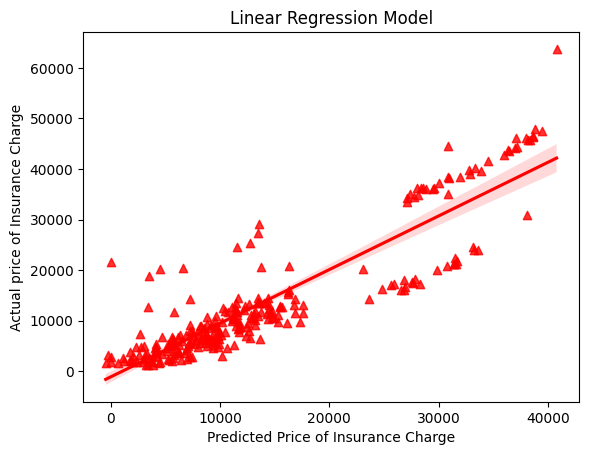

In [ ]:
# predict quantities with the finalized regression model by calling the predict() function on the finalized model.
y_predict_linear = L_model.predict(X_test)
# This method is used to plot data and a linear regression model fit
fig = sns.regplot(x=y_predict_linear, y=y_test, color='red', marker='^')
fig.set(title='Linear Regression Model',
        xlabel='Predicted Price of Insurance Charge',
        ylabel = 'Actual price of Insurance Charge'
        )

In [ ]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear))))
MSE = mean_squared_error(y_test, y_predict_linear)
MAE = mean_absolute_error(y_test, y_predict_linear)
r2 = r2_score(y_test, y_predict_linear)
print('RMSW =', RMSE,'\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2)

RMSW = 5531.784303349207 
MSE = 30600637.578780673 
MAE = 4009.551705250051 
R2 = 0.799859199880231


[Text(0.5, 1.0, 'Random Forest Regression Model'),
 Text(0.5, 0, 'Predicted Price of Insurance Charge'),
 Text(0, 0.5, 'Actual price of Insurance Charge')]

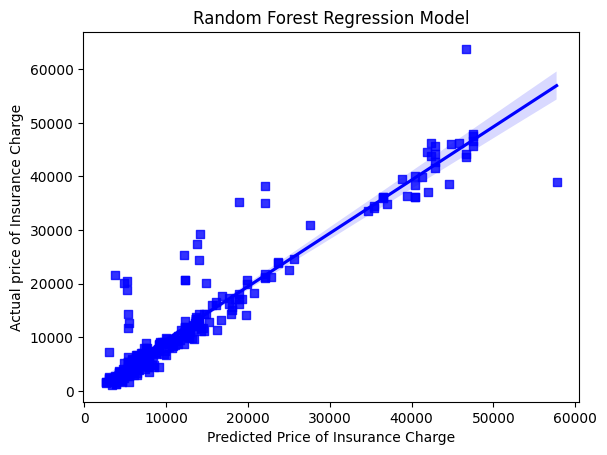

In [ ]:
#Random forest
# predict quantities with the finalized regression model by calling the predict() function on the finalized model.
y_predict_RandomForest = RandomForest_model.predict(X_test)
# This method is used to plot data and a linear regression model fit
fig = sns.regplot(x=y_predict_RandomForest, y=y_test, color='blue', marker='s')
fig.set(title='Random Forest Regression Model',
        xlabel='Predicted Price of Insurance Charge',
        ylabel = 'Actual price of Insurance Charge'
        )

In [ ]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest))))
MSE = mean_squared_error(y_test, y_predict_RandomForest)
MAE = mean_absolute_error(y_test, y_predict_RandomForest)
r2 = r2_score(y_test, y_predict_RandomForest)
print('RMSW =', RMSE,'\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2)

RMSW = 4007.7584681054727 
MSE = 16062127.938671127 
MAE = 2380.289482172176 
R2 = 0.8949470536685521


[Text(0.5, 1.0, 'XGBoost Model'),
 Text(0.5, 0, 'Predicted Price of Insurance Charge'),
 Text(0, 0.5, 'Actual price of Insurance Charge')]

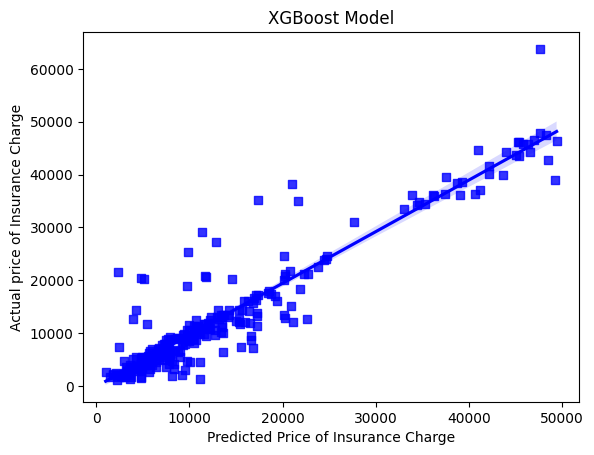

In [ ]:
#XGBoost
y_predict_XGBoost = model.predict(X_test)
# This method is used to plot data and a linear regression model fit
fig = sns.regplot(x=y_predict_XGBoost, y=y_test, color='blue', marker='s')
fig.set(title='XGBoost Model',
        xlabel='Predicted Price of Insurance Charge',
        ylabel = 'Actual price of Insurance Charge'
        )

In [ ]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost))))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)
print('RMSW =', RMSE,'\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2)

RMSW = 4311.662465380477 
MSE = 18590433.215370856 
MAE = 2497.146448085121 
R2 = 0.878410893605776


**[My Note]**

1. Root Mean Squared Error (RMSE): A measure of the average prediction error.
Lower RMSE values indicate better accuracy.

2. Mean Squared Error (MSE): Measures the average of the squares of errors. Smaller MSE values represent more accurate predictions.

3. Mean Absolute Error (MAE): Measures the average absolute differences between predictions and actual values. Lower MAE values indicate better accuracy.

4. R-squared (R2): Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher R2 values indicate better accuracy.

Smaller RMSE, MSE, and MAE values indicate higher accuracy.
Higher R-squared values (closer to 1) indicate better accuracy.


**Conclusion**


From the comparison of the results, I would say the Random Forest Regression model is the best at predicting insurance charges among the compared models. It has the smallest errors, meaning its predictions are closest to the actual values. The other models, Linear Regression and XGBoost, also perform well, but Random Forest stands out with more accurate predictions. In simpler terms, if you want a model that gives you the most reliable estimates for insurance charges, the Random Forest model is the way to go.